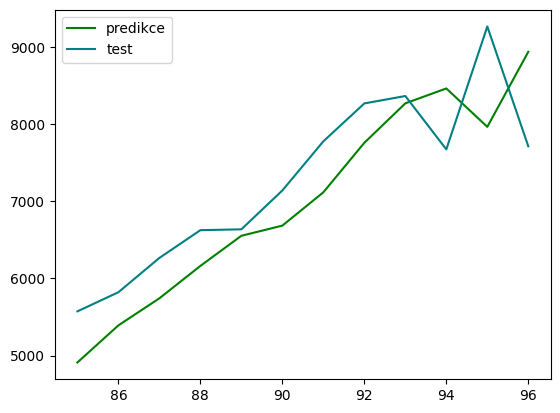

1
Mean absolute error: 600.40
Mean squared error: 488106.89
Root mean squared error: 698.65
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5807.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                    2.03e-94
Time:                        19:47:28   Log-Likelihood:                         -639.84
No. Observations:                  84   AIC:                                      1286.
Df Residuals:                      81   BIC:                                      1293.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std

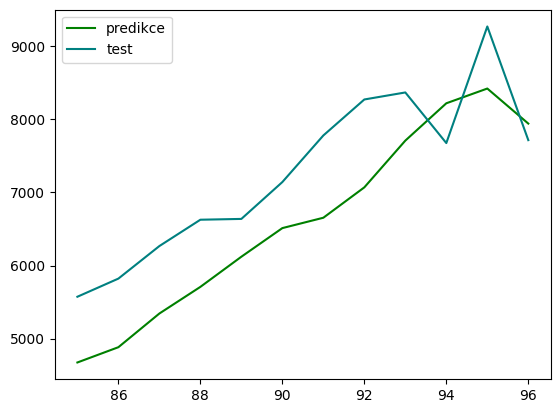

2
Mean absolute error: 785.59
Mean squared error: 687827.30
Root mean squared error: 829.35
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3828.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                    3.94e-87
Time:                        19:47:28   Log-Likelihood:                         -657.24
No. Observations:                  84   AIC:                                      1320.
Df Residuals:                      81   BIC:                                      1328.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std

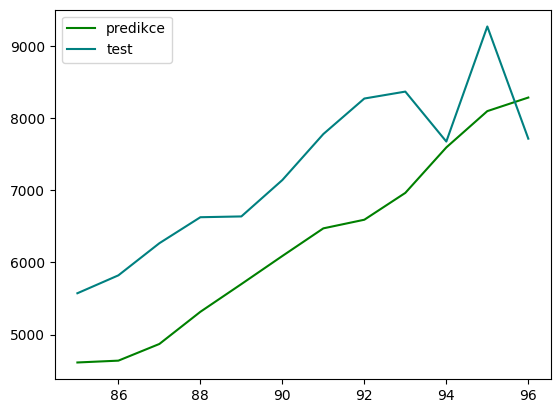

3
Mean absolute error: 1087.18
Mean squared error: 1346804.96
Root mean squared error: 1160.52
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2597.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                    2.30e-80
Time:                        19:47:28   Log-Likelihood:                         -673.40
No. Observations:                  84   AIC:                                      1353.
Df Residuals:                      81   BIC:                                      1360.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    

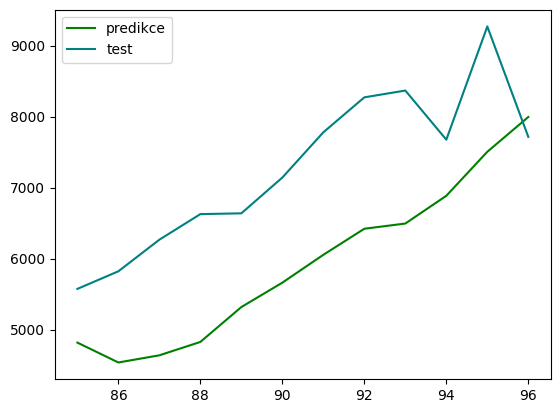

4
Mean absolute error: 1379.10
Mean squared error: 2146876.12
Root mean squared error: 1465.22
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1853.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                    1.68e-74
Time:                        19:47:29   Log-Likelihood:                         -687.40
No. Observations:                  84   AIC:                                      1381.
Df Residuals:                      81   BIC:                                      1388.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    

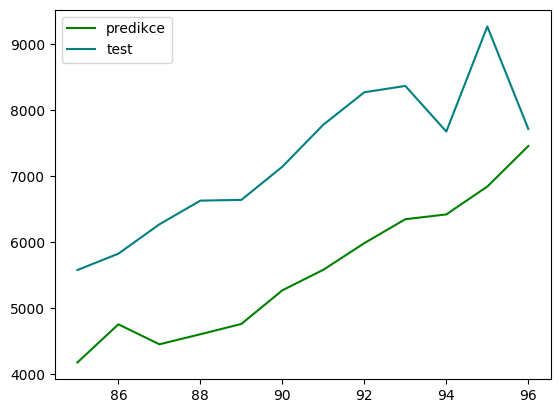

5
Mean absolute error: 1711.33
Mean squared error: 3276175.95
Root mean squared error: 1810.02
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              1337.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                    7.28e-69
Time:                        19:47:29   Log-Likelihood:                         -700.86
No. Observations:                  84   AIC:                                      1408.
Df Residuals:                      81   BIC:                                      1415.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    

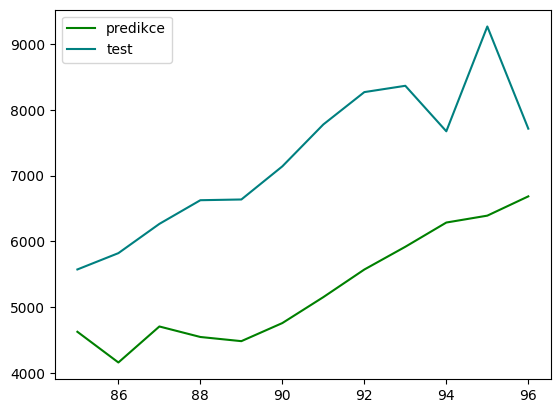

6
Mean absolute error: 1987.87
Mean squared error: 4347879.51
Root mean squared error: 2085.16
                                 OLS Regression Results                                
Dep. Variable:                aktivni   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1066.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                    5.75e-65
Time:                        19:47:29   Log-Likelihood:                         -710.17
No. Observations:                  84   AIC:                                      1426.
Df Residuals:                      81   BIC:                                      1434.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    

In [220]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

import statsmodels.api as sm
test = True
out = True
graf = True


df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])
#>>normalizovat dataframe 
#//df=(df-df.min())/(df.max()-df.min())

models = []
predictions = []
rmse_list = []
y_pred_list = []
#>> trenink modelů
for i in range(1,7):
    repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
    aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
    nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
    #//cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
    #//zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
    doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']
    #* definovat data
    X = df[[aktivni[i-1],*nove[i-1:i+1]]]
    y = df[['aktivni']]
    #* training dataframe bez randomizace
    X_train = X.drop(X.index[-12:])
    y_train = y.drop(y.index[-12:])
    #* testing dataframe bez randomizace
    X_test = X.drop(X.index[:-12])
    y_test = y.drop(y.index[:-12])
    #*fit OLS reresi na train datech
    model = sm.OLS(y_train,X_train).fit()
    if test:
        # Predict on the test set
        y_pred = model.predict(X_test)
        y_pred_list.append(y_pred)
        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rmse_list.append(rmse)
        
    #*dotrenovat model na vsech datech
    model = sm.OLS(y,X).fit()
    #*pridat modely do listu pro ulozeni
    models.append(model)
    if graf:
        #>>graf
        #*definovat realna data 
        plt.plot(X_test.index, y_pred.values, label='predikce', color="green")
        plt.plot(X_test.index, y_test.values, label='test', color="teal")
        #//plt.plot(X_test.index, y_pred.values - rmse, label='min', color="orange")
        #//plt.plot(X_test.index, y_pred.values + rmse, label='max', color="red")
        #plt.ylim(0, 11000)
        plt.legend()
        plt.show()
    if out:
        print(len(models))
        print(f"Mean absolute error: {mae:.2f}")
        print(f"Mean squared error: {mse:.2f}")
        print(f"Root mean squared error: {rmse:.2f}")
        print(model.summary())

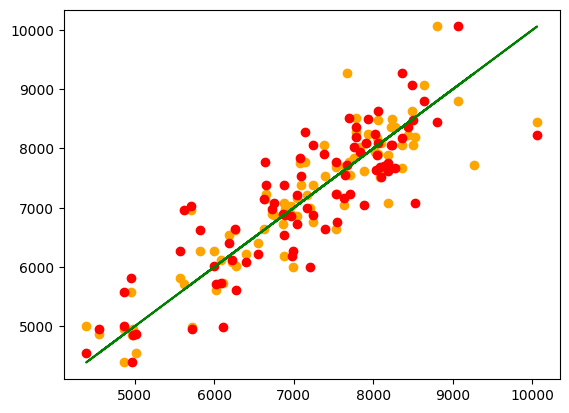

In [177]:
#df=(df-df.min())/(df.max()-df.min())
plt.scatter(df["aktivni-1"],y,color="orange")
plt.scatter(df["aktivni-2"],y,color="red")
plt.plot(df['aktivni'],y,color="green")

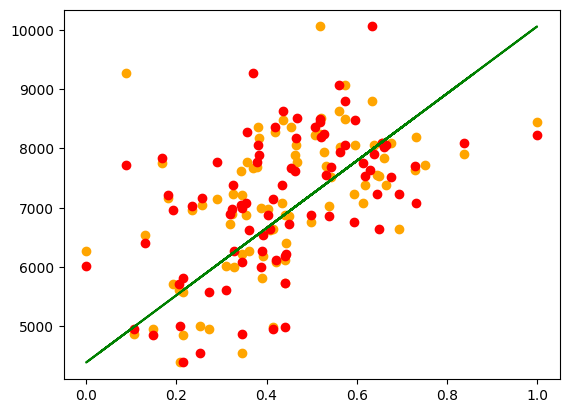

In [178]:
df=(df-df.min())/(df.max()-df.min())
plt.scatter(df["nove-1"],y,color="orange")
plt.scatter(df["nove-2"],y,color="red")
plt.plot(df['aktivni'],y,color="green")

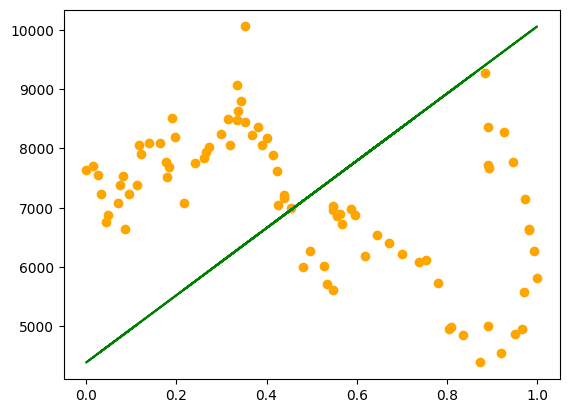

In [166]:
df=(df-df.min())/(df.max()-df.min())
plt.scatter(df["cena"],y,color="orange")
plt.plot(df['aktivni'],y,color="green")

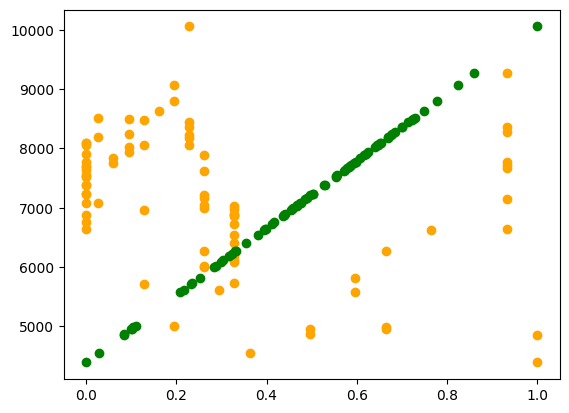

In [221]:
# Ulozit model
#ulozit model
import pickle
i=1
for model in models:
    filename = f'OLS_model_final_copy2_{i}.sav'
    pickle.dump(model, open(filename, 'wb'))
    #ulozit rmse pro modely
    with open('rmse.pkl', 'wb') as file:
        pickle.dump(rmse_list, file)
    i +=1

predikce

   index     datum  predikce  rmse          min          max
0     97  [202303]      8132   699  7433.470426  8830.763360
1     98  [202304]      7971   829  7141.969502  8800.676595
2     99  [202305]      7973  1161  6812.557190  9133.595718
3    100  [202306]      7829  1465  6364.539626  9294.984041
4    101  [202307]      7679  1810  5869.608016  9489.649977
5    102  [202308]      7875  2085  5790.516483  9960.830386


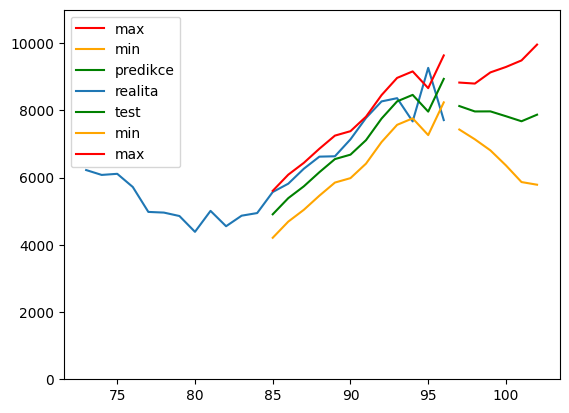

In [222]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
#df = (df-df.min())/(df.max()-df.min())

test = True
#* definovat listy promenejch
repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7']
aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7']
nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7']
#//cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7']
#//zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7']
doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7']

#>> nacist modely a rmse
#* nacist nejlepsi model
models = []
for i in range(1,7):
    filename = f'OLS_model_final_copy2_{i}.sav'
    model = pickle.load(open(filename, 'rb'))
    models.append(model)
#* nacist rmse pro modely
with open('rmse.pkl', 'rb') as file:
    rmse_values = pickle.load(file)
    
#>> predikce
predictions = []
for i in range(1,7):
    #* vybrat spravny x promeny
    x_new = df.drop(df.index[:-12])
    x_new = x_new[[aktivni[i-1], *nove[i-1:i+1]]]
    #* vybrat spravnej radek a ostatni odstranit
    x_new_pro_graf = x_new
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[i:])
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[:-1])
    x_new = x_new.reset_index(drop=True)
    x_new = x_new.drop(x_new.index[i:])
    x_new = x_new.drop(x_new.index[:-1])

    # vybrat spravnej model
    model = models[i-1]
    #*predikce na novych datech
    y_new_pred = model.predict(x_new)
    #>> predikce do dictu
    if test:
        #* vytvorit dict pro predikce
        prediction = {"index" : int(x_new_pro_graf.index.values),
                    "datum": datum.values[i-1],
                    "predikce": int(y_new_pred),
                    "rmse" : round(float(rmse_values[i-1])),
                    "min": y_new_pred[i-1] - rmse_values[i-1],
                    "max": y_new_pred[i-1] + rmse_values[i-1]}
    else:
        prediction = {"index" : int(x_new_pro_graf.index.values),
                    "datum": x_new["datum"].values[0],
                    "predikce": int(y_new_pred.values[0])}
    #* pridat predikce do dictu
    predictions.append(prediction)

#* dataframe z predikce dictu
df_predictions = pd.DataFrame(predictions)
print(df_predictions)

#>>graf
#* definovat realna data 
X_graf = df[["datum"]]
Y_graf = df[['aktivni']]
#* cary do budoucnosti
plt.plot(df_predictions['index'], df_predictions['max'], color='red', label="max")
plt.plot(df_predictions['index'], df_predictions['min'], color="orange", label="min")
plt.plot(df_predictions['index'], df_predictions['predikce'], color="green", label="predikce")
#* cary do minulosti
plt.plot(X_graf.index[-36:].values,Y_graf[-36:], label='realita')
#* cary s predikcema do minulosti
y_test_pred_max = y_pred_list[0] + rmse_values[0]
y_test_pred_min = y_pred_list[0] - rmse_values[0]
plt.plot(X.index[-12:], y_pred_list[0].values, label='test', color="green")
plt.plot(X.index[-12:], y_test_pred_min, label='min', color="orange")
plt.plot(X.index[-12:], y_test_pred_max, label='max', color="red")
plt.ylim(0, 11000)#zobrazuje graf od 0 na ose y
plt.legend()
plt.show()